# WASP-80b: Datacube creation

Hannu Parviainen, Alice Booth, Mantas Abazorius                                                      
hannu.parviainen@physics.ox.ac.uk


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from src.core import *

In [3]:
bias  = {k:v for k,v in load(f_bias_dn).items()}
flats = {k:v-bias[k][:,newaxis] for k,v in load(f_flats).items()}
flats = {k:v/median(v) for k,v in flats.items()}

In [4]:
spectra = dict(n1ccd1 = pf.getdata(l_obj[0][1], ext=1).astype(float64),
               n1ccd2 = pf.getdata(l_obj[0][1], ext=2).astype(float64),
               n2ccd1 = pf.getdata(l_obj[1][1], ext=1).astype(float64),
               n2ccd2 = pf.getdata(l_obj[1][1], ext=2).astype(float64),)
spectra = {k:v-bias[k][:,newaxis] for k,v in spectra.items()}

## Bias corrected

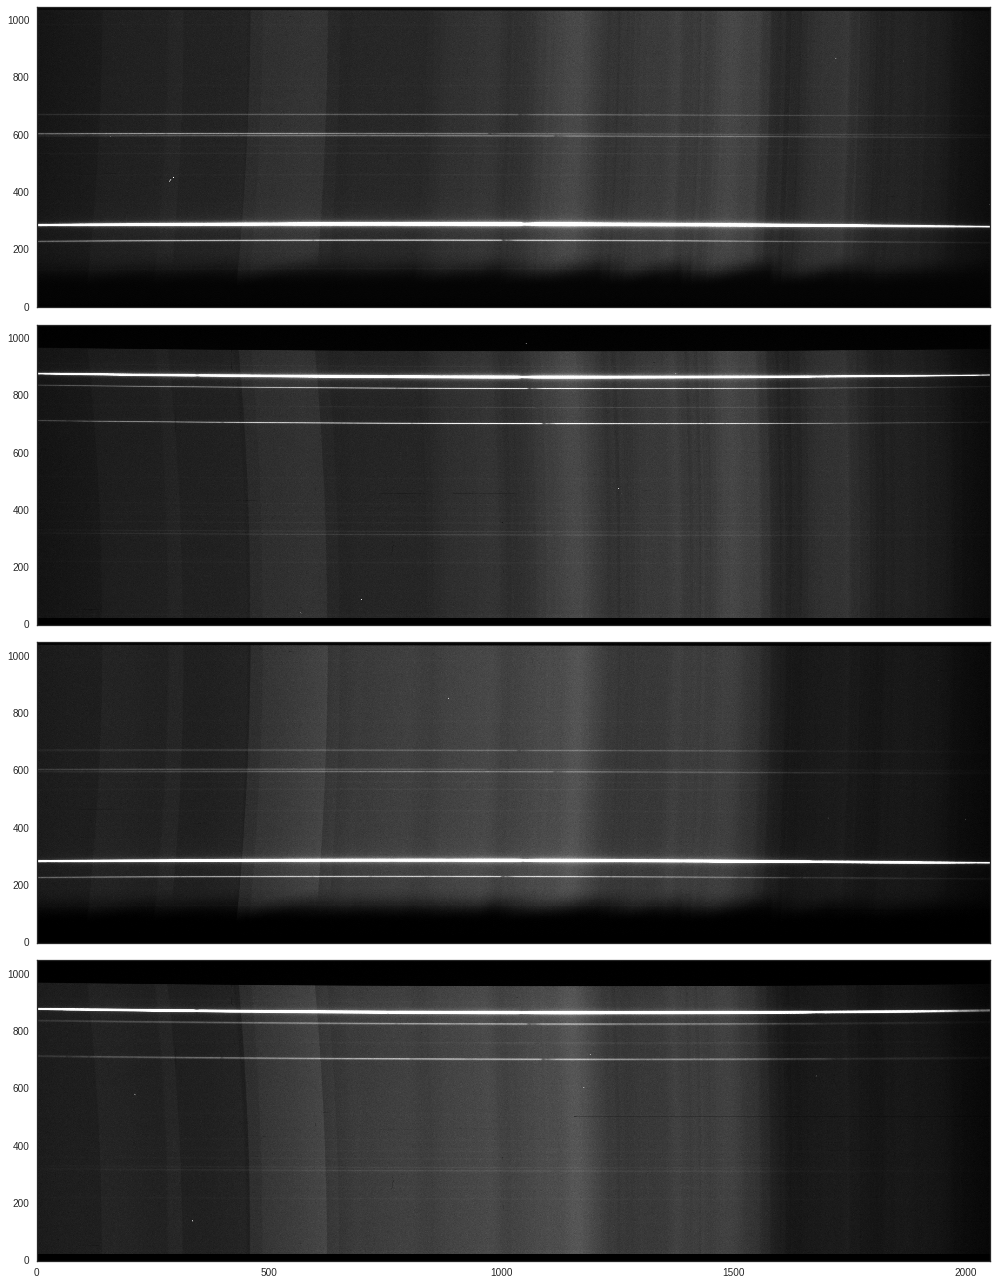

In [5]:
fig,axs = subplots(4,1,figsize=(14,18), sharex=True, sharey=True)
for i,k in enumerate(nccdkeys):
    axs.flat[i].imshow(spectra[k].T, cmap=cm.gray, aspect='auto', origin='image', vmin=0, vmax=1300)
fig.tight_layout()

## Bias and flat corrected

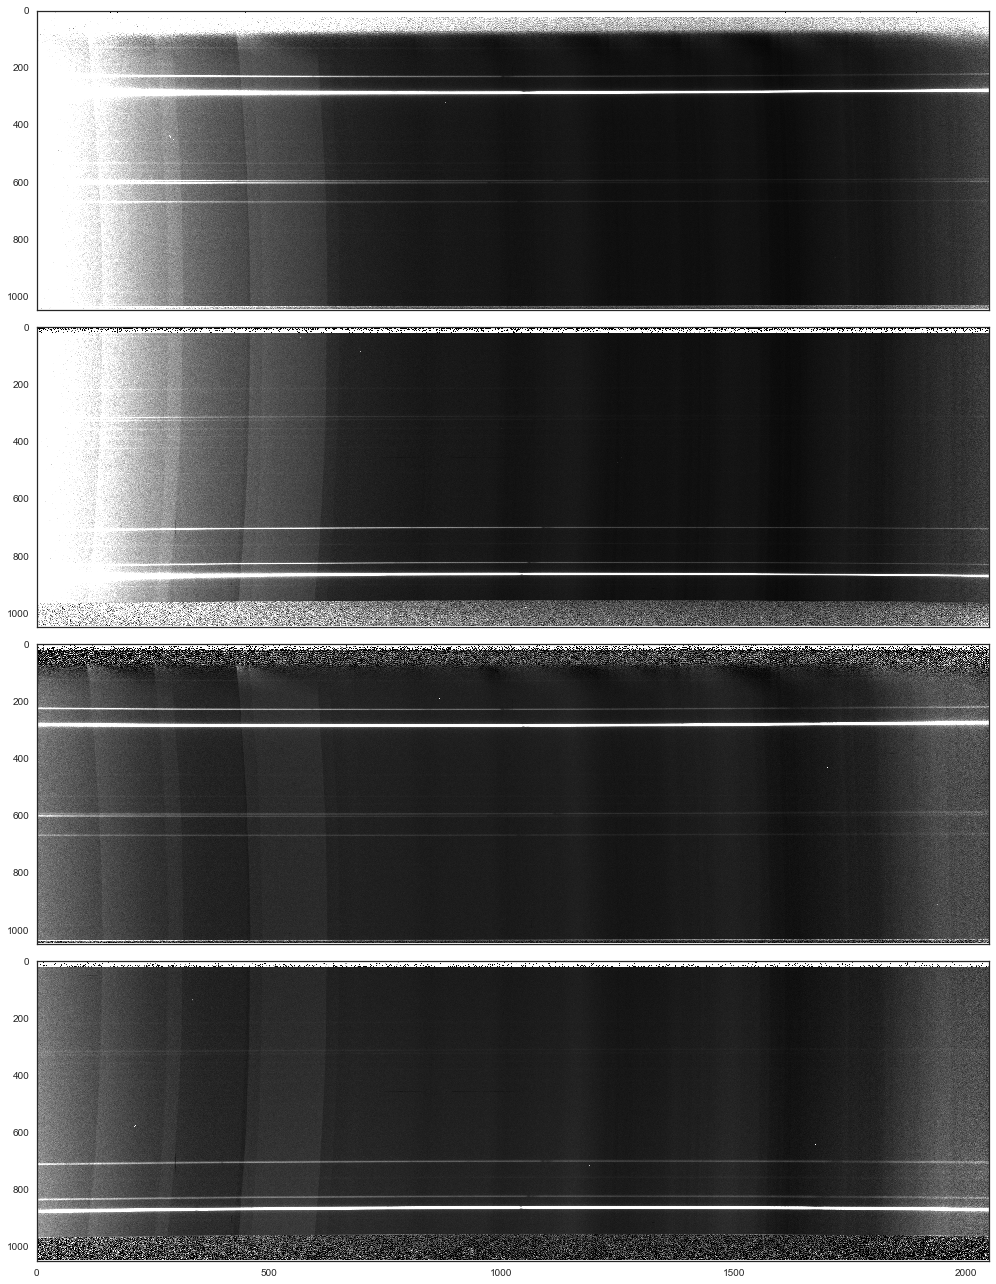

In [44]:
fig,axs = subplots(4,1,figsize=(14,18), sharex=True, sharey=True)
for i,k in enumerate(nccdkeys):
    axs.flat[i].imshow((spectra[k]/flats[k]).T, cmap=cm.gray, aspect='auto', vmin=0, vmax=1500)
fig.tight_layout()

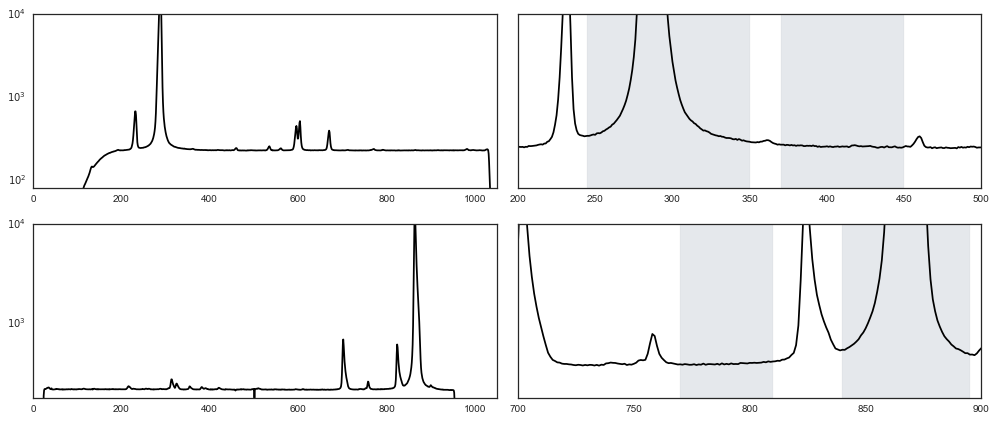

In [59]:
fig,ax = subplots(2,2,figsize=(14,6))
ax[0,0].semilogy(spectra['n1ccd1'].mean(0), 'k')
ax[0,1].axvspan(245,350, alpha=0.1)
ax[0,1].axvspan(370,450, alpha=0.1)
ax[0,1].semilogy(spectra['n1ccd1'].mean(0), 'k')
setp(ax[0,0], ylim=(80,1e4), xlim=(0,spectra['n1ccd1'].shape[1]))
setp(ax[0,1], ylim=(180,5e2), xlim=(200,500))

ax[1,0].semilogy(spectra['n1ccd2'].mean(0), 'k')
ax[1,1].axvspan(840,895, alpha=0.1)
ax[1,1].axvspan(770,810, alpha=0.1)
ax[1,1].semilogy(spectra['n1ccd2'].mean(0), 'k')
setp(ax[1,0], ylim=(180,1e4), xlim=(0,spectra['n1ccd2'].shape[1]))
setp(ax[1,1], ylim=(180,5e2), xlim=(700,900))
fig.tight_layout()

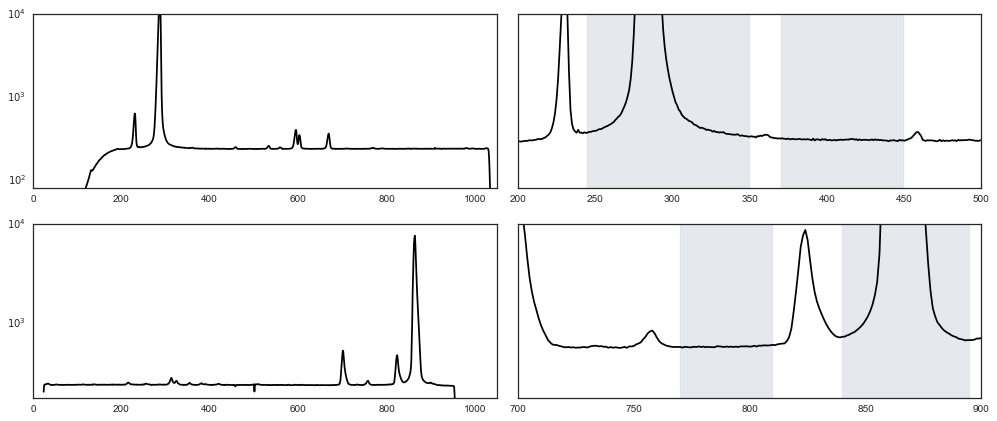

In [60]:
fig,ax = subplots(2,2,figsize=(14,6))
ax[0,0].semilogy(spectra['n2ccd1'].mean(0), 'k')
ax[0,1].axvspan(245,350, alpha=0.1)
ax[0,1].axvspan(370,450, alpha=0.1)
ax[0,1].semilogy(spectra['n2ccd1'].mean(0), 'k')
setp(ax[0,0], ylim=(80,1e4), xlim=(0,spectra['n2ccd1'].shape[1]))
setp(ax[0,1], ylim=(180,5e2), xlim=(200,500))

ax[1,0].semilogy(spectra['n2ccd2'].mean(0), 'k')
ax[1,1].axvspan(840,895, alpha=0.1)
ax[1,1].axvspan(770,810, alpha=0.1)
ax[1,1].semilogy(spectra['n2ccd2'].mean(0), 'k')
setp(ax[1,0], ylim=(180,1e4), xlim=(0,spectra['n2ccd2'].shape[1]))
setp(ax[1,1], ylim=(180,5e2), xlim=(700,900))
fig.tight_layout()